# Nicht generatives Trainig mit DeepHull simple loss

In [17]:
import torch

from script.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification import verification

In [18]:
sequential = False
epochs = 3
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 0.1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

if not sequential:
    icnn = ICNN([2, 10, 10, 1])
else:
    icnn = SequentialNN([2, 10, 10, 1])

In [19]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()

dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

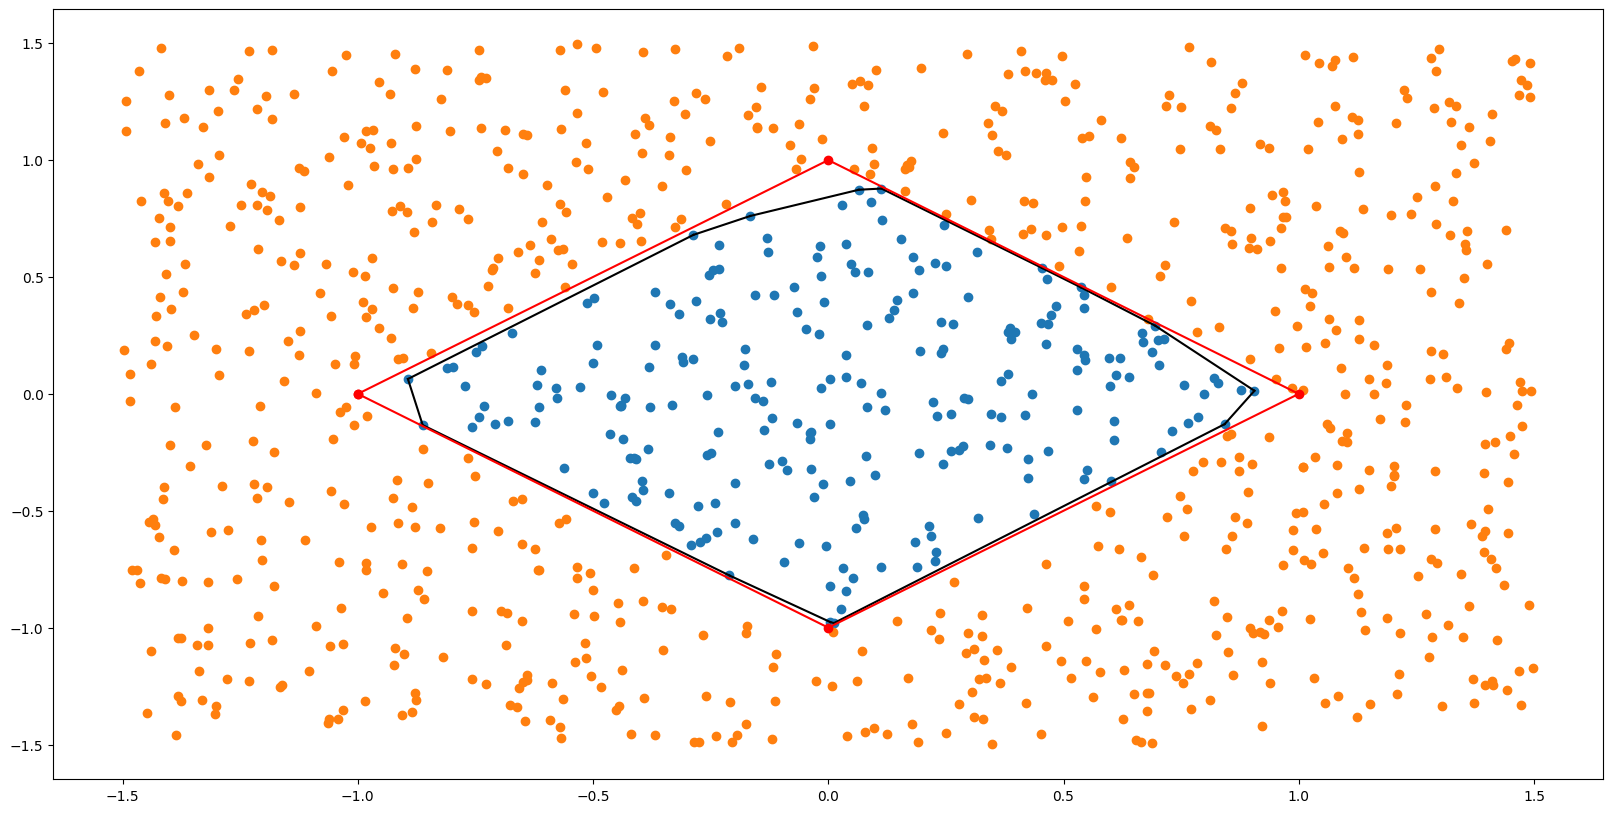

In [20]:
plots = Plots_for(0, icnn, included_space.detach(), ambient_space.detach(), true_extremal_points, x_range, y_range)
plots.plt_initial()

In [21]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, sequential=sequential, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 0.6645484498591783
batch = 100, mean loss = 0.7465100357664367
batch = 200, mean loss = 0.7248838162576869
batch = 239, mean loss = 0.7171358188860054


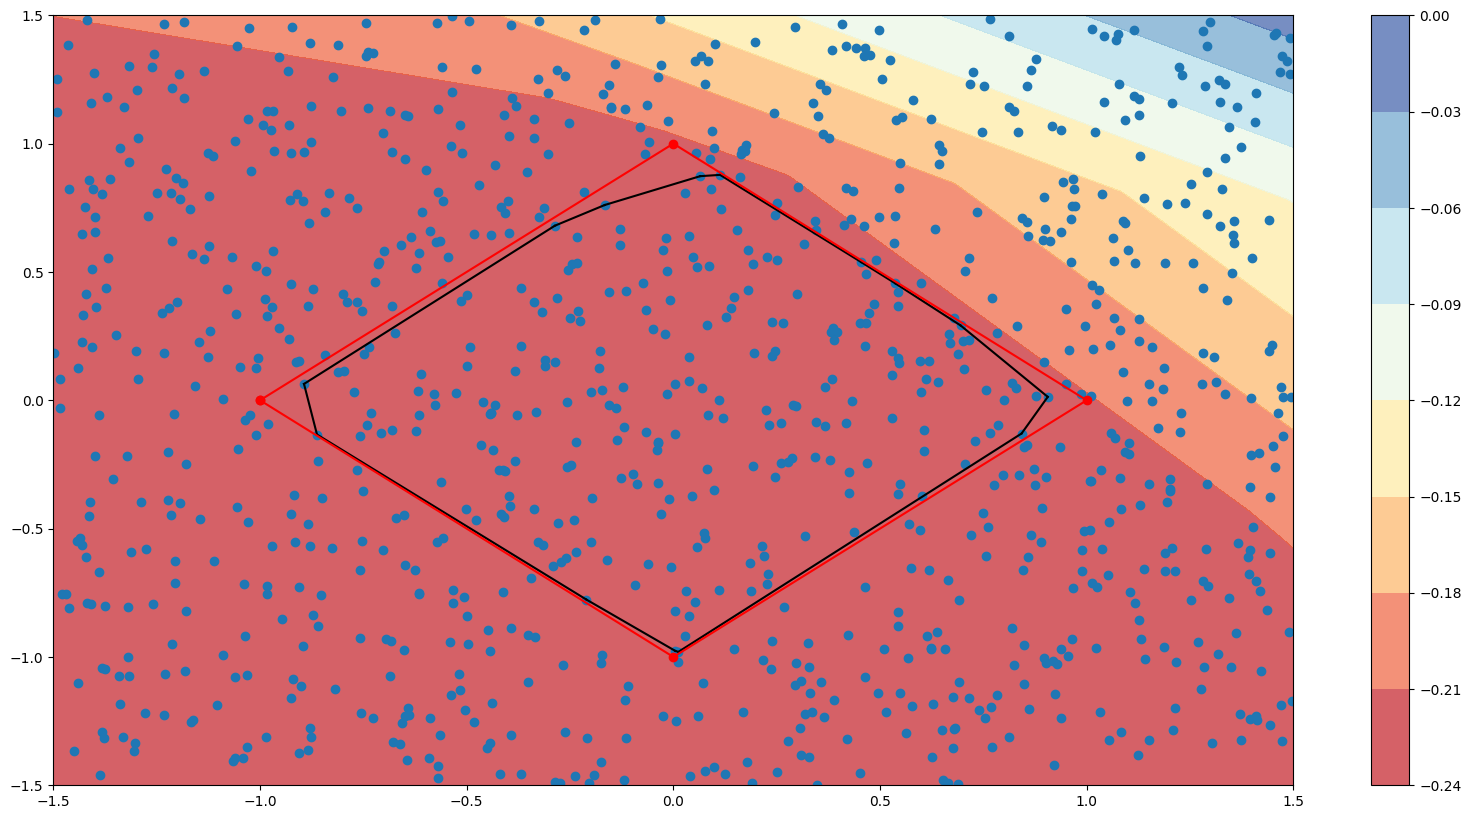

In [22]:
plots.plt_mesh()

In [23]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A=A, b=b, sequential=sequential)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 106 rows, 64 columns and 290 nonzeros
Model fingerprint: 0xd23ea9db
Variable types: 44 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [6e-04, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+03]
  RHS range        [4e-03, 1e+03]
Found heuristic solution: objective -0.2207404
Presolve removed 54 rows and 30 columns
Presolve time: 0.00s
Presolved: 52 rows, 34 columns, 185 nonzeros
Variable types: 20 continuous, 14 integer (14 binary)

Root relaxation: objective 1.405760e+02, 26 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  140.57599    0 

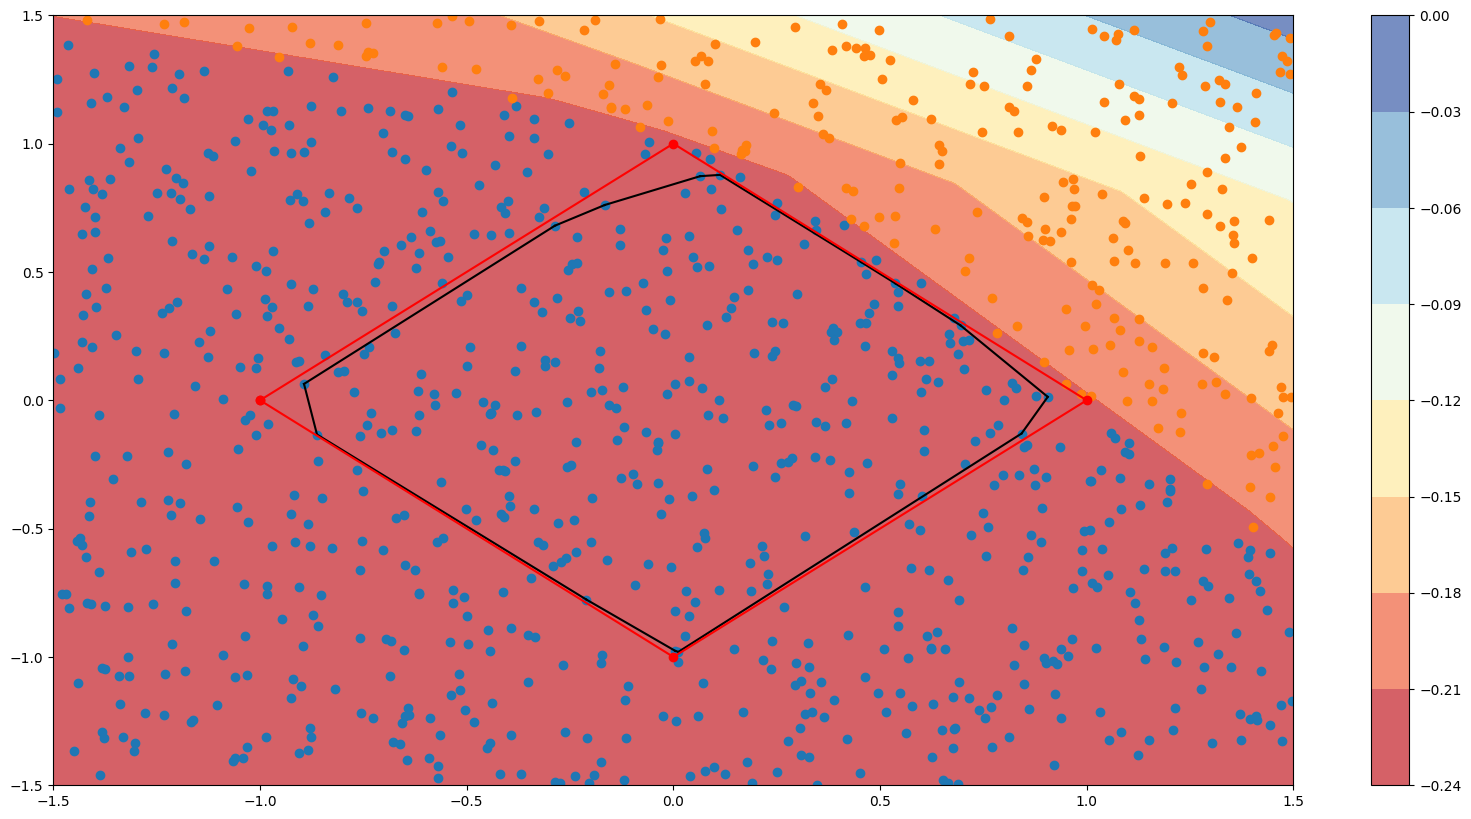

In [24]:
input_data, plots.c = result
plots.plt_mesh()